# Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from model.resnet34_unet import ReNet34_UNet

/Users/bmd1905/miniforge3/envs/ocr/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


# Inference

In [3]:
# Create model
ob = ReNet34_UNet((224, 224, 3))
model = ob.build_model()

# load model
model.load_weights('./pretrained/de_makeup_30_epoch.h5')

In [23]:
def display_imgs(input_img, output_img):
    imges = [input_img, output_img]
    title = ['Input', 'Output']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(imges[i])
        plt.axis('off')
    plt.show()

def predict(img_path):
    # load the image from file
    img = load_img(img_path, target_size=(224, 224, 3))

    # convert the image to a tensor
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    # reshape to math with the size of model
    img_tensor = tf.reshape(img_tensor, (1, 224, 224, 3))

    # predict
    output = model(img_tensor)
    # reshape to the actual size to display
    output = tf.reshape(output, (224, 224, 3))
    # convert the tensor to an image
    output_image = tf.keras.preprocessing.image.array_to_img(output)

    # display the input and output images
    display_imgs(img, output_image)

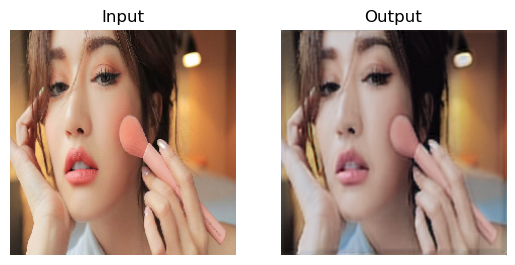

In [24]:
img_path = './sample/makeup2.jpg'

predict(img_path)